In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

%matplotlib inline

In [2]:
def classify_answers(df, q, a1, a2):
    if df[q] == a1:
        return 'no'
    elif df[q] == a2:
        return 'no se'
    else : 
        return 'si'


def classify_answers_gratuidad_3grupos(df):
    if df['q_gratuidad'] == 'a_gratuidad_publicidades' : 
        return 'correcta'
    elif 'a_gratuidad_publicidades' in df['q_gratuidad'].replace(" ", "").split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'mixta'
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
        return 'no se'
    else : 
        return 'misconception'

    
def classify_answers_gratuidad(df):
    if 'a_gratuidad_publicidades' in df['q_gratuidad'].split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'no' # misconception parcial NO Es misconception
    elif df['q_gratuidad'] == 'a_gratuidad_nose': # consideramos que no se NO es misconception
        return 'no'
    else : 
        return 'si'
    


In [3]:
df = pd.read_csv("../data/respuestas.csv")
df.shape

(144, 17)

# Almacenamiento de datos en YouTube

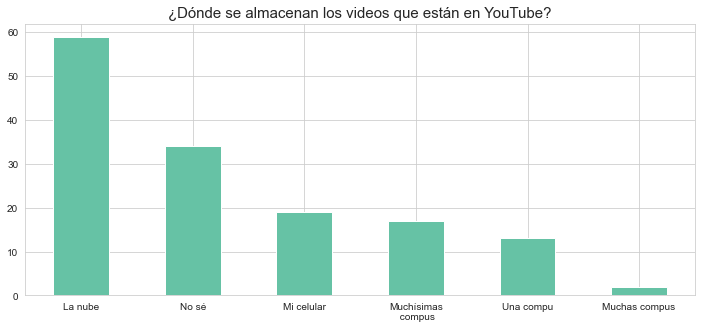

In [4]:
# ¿Dónde se almacenan los videos que están en YouTube?
positions = (0, 1, 2, 3, 4, 5)
labels = ("La nube", "No sé", "Mi celular", "Muchísimas\n compus", "Una compu", "Muchas compus")

df["q_yt"].value_counts().plot.bar(figsize=(12,5))
plt.title("¿Dónde se almacenan los videos que están en YouTube?", fontsize=15)
plt.xticks(positions, labels,rotation=0);

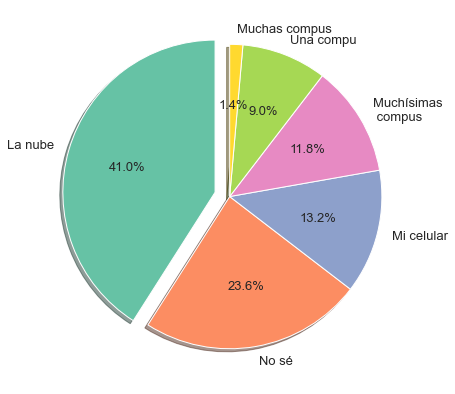

In [5]:
# ¿Dónde se almacenan los videos que están en YouTube? - Gráfico de torta


#plt.rc('xtick', labelsize=13) 
#plt.rc('ytick', labelsize=15) 
plt.rcParams['font.size'] = 13.0
labels = ("La nube", "No sé", "Mi celular", "Muchísimas\n compus", "Una compu", "Muchas compus")
explode = (0.1, 0, 0, 0, 0, 0)
df["q_yt"].value_counts().plot.pie(explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(12,7));
plt.gca().axes.get_yaxis().set_visible(False)


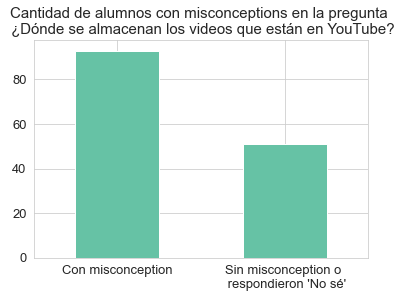

In [6]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception o \n respondieron 'No sé'")

df['misconception_yt'] = np.where((df['q_yt']=='a_yt_muchisimascompu') | (df['q_yt']=='a_yt_nose'), 'no', 'si')

df["misconception_yt"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Dónde se almacenan los videos que están en YouTube?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);



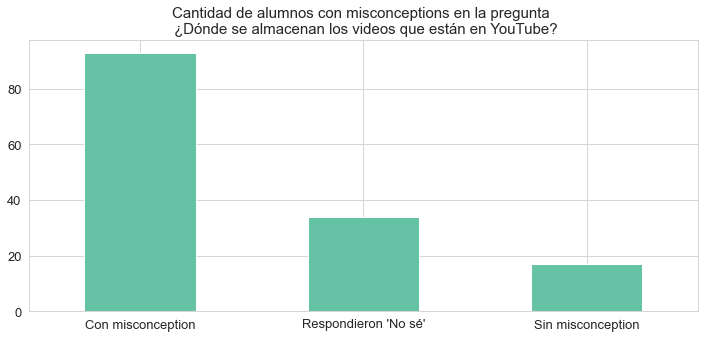

In [7]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")

df['misconception_yt2'] = df.apply(lambda x: classify_answers(x, q='q_yt', a1='a_yt_muchisimascompu', a2='a_yt_nose'), axis=1)
df["misconception_yt2"].value_counts().plot.bar(rot=0, figsize=(12,5));
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Dónde se almacenan los videos que están en YouTube?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);

# Privacidad, existencia e intercambio de archivos en WhatsApp

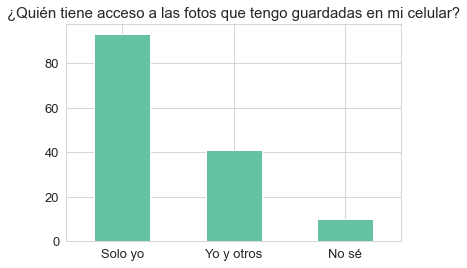

In [8]:
# ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?
positions = (0, 1, 2)
labels = ("Solo yo", "Yo y otros", "No sé")

df["q_acceso_fotos"].value_counts().plot.bar()
plt.title("¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", fontsize=15)
plt.xticks(positions, labels, rotation=0);

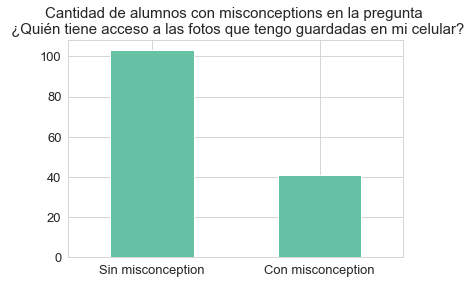

In [9]:
positions = (0, 1)
labels = ("Sin misconception", \
          "Con misconception")

df['misconception_acceso_fotos'] = np.where((df['q_acceso_fotos']=='a_acceso_fotos_yo') | (df['q_acceso_fotos']=='a_acceso_fotos_nose'), 'no', 'si')
df["misconception_acceso_fotos"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

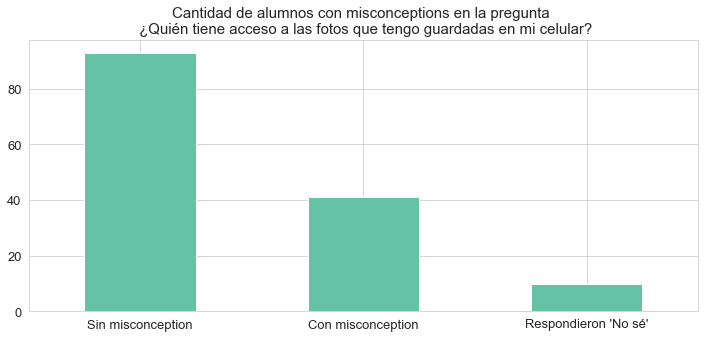

In [10]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Sin misconception", "Con misconception", "Respondieron 'No sé'")

df['misconception_acceso_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_acceso_fotos', a1='a_acceso_fotos_yo', a2='a_acceso_fotos_nose'), axis=1)
df["misconception_acceso_fotos2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

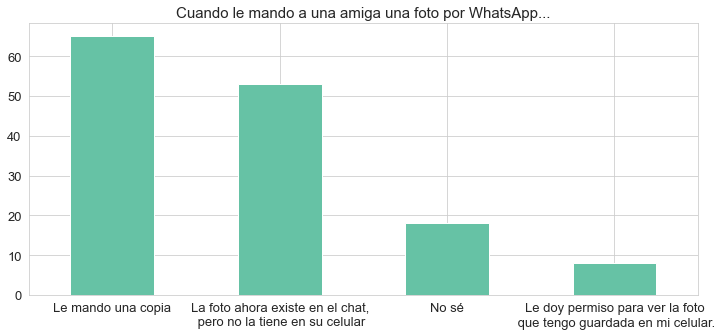

In [11]:
# Cuando le mando a una amiga una foto por WhatsApp...
positions = (0, 1, 2, 3)
labels = ("Le mando una copia", \
          "La foto ahora existe en el chat,\n pero no la tiene en su celular", \
          "No sé", \
          "Le doy permiso para ver la foto\n que tengo guardada en mi celular.")


df["q_mandar_fotos"].value_counts().plot.bar(figsize=(12,5))
plt.title("Cuando le mando a una amiga una foto por WhatsApp...", fontsize=15)
plt.xticks(positions, labels, rotation=0);


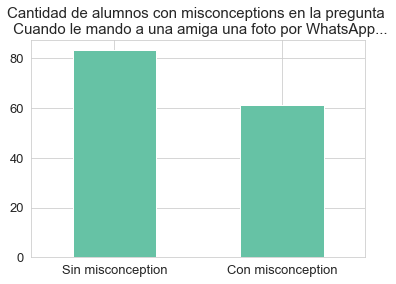

In [12]:
positions = (0, 1)
labels = ("Sin misconception", \
          "Con misconception")

df['misconception_mandar_fotos'] = np.where((df['q_mandar_fotos']=='a_mandar_fotos_copia') | (df['q_mandar_fotos']=='a_mandar_fotos_nose'), 'no', 'si')
df["misconception_mandar_fotos"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n Cuando le mando a una amiga una foto por WhatsApp...", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

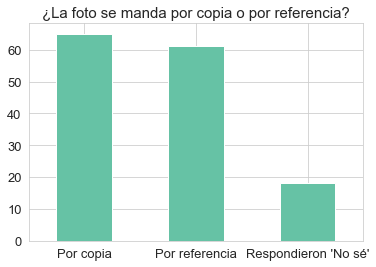

In [13]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Por copia", "Por referencia", "Respondieron 'No sé'")

df['misconception_mandar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_mandar_fotos', a1='a_mandar_fotos_copia', a2='a_mandar_fotos_nose'), axis=1)
df["misconception_mandar_fotos2"].value_counts().plot.bar(rot=0);

plt.title("¿La foto se manda por copia o por referencia?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


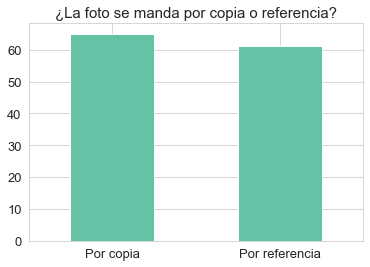

In [14]:
# Copia vs ref
positions = (0, 1)
labels = ("Por copia","Por referencia")
df["q_mandar_fotos_agrup"].value_counts()[:2].plot.bar();
plt.title("¿La foto se manda por copia o referencia?", fontsize=15);
plt.xticks(positions, labels, rotation=0);

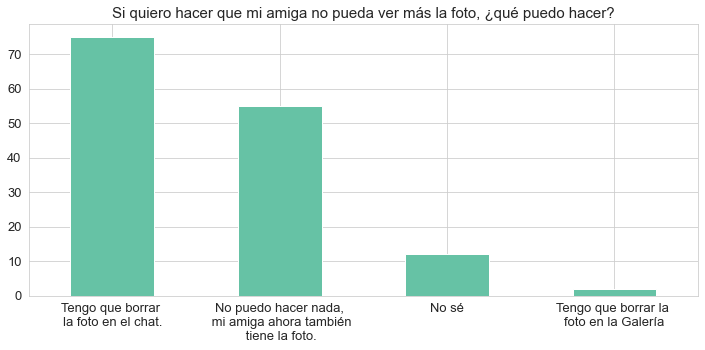

In [15]:
# Si quiero hacer que mi amiga no pueda ver más la foto, ¿qué puedo hacer?

positions = (0, 1, 2, 3)
labels = ("Tengo que borrar \nla foto en el chat.", \
          "No puedo hacer nada,\n mi amiga ahora también\n tiene la foto.", \
          "No sé", \
          "Tengo que borrar la \nfoto en la Galería")


df["q_borrar_fotos"].value_counts().plot.bar(figsize=(12,5))
plt.title("Si quiero hacer que mi amiga no pueda ver más la foto, ¿qué puedo hacer?", fontsize=15)

plt.xticks(positions, labels, rotation=0);



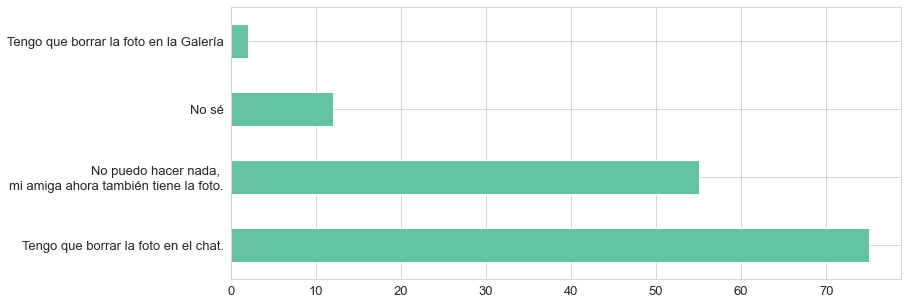

In [16]:
# Misma info que el grafico anterior pero en barras horizontales
# Tamaño de la fuente

#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 
positions = (0, 1, 2, 3)
labels = ("Tengo que borrar la foto en el chat.", \
          "No puedo hacer nada, \nmi amiga ahora también tiene la foto.", \
          "No sé", \
          "Tengo que borrar la foto en la Galería")

df["q_borrar_fotos"].value_counts().plot.barh(figsize=(12,5));
plt.yticks(positions, labels, rotation=0);

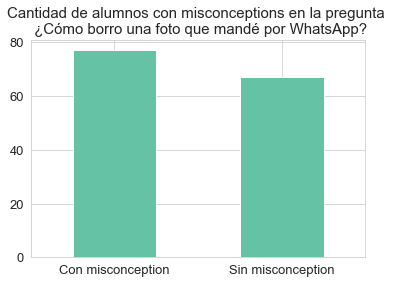

In [17]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_borrar_fotos'] = np.where((df['q_borrar_fotos']=='a_borrar_fotos_nopuedo') | (df['q_borrar_fotos']=='a_borrar_fotos_nose'), 'no', 'si')
df["misconception_borrar_fotos"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo borro una foto que mandé por WhatsApp?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);

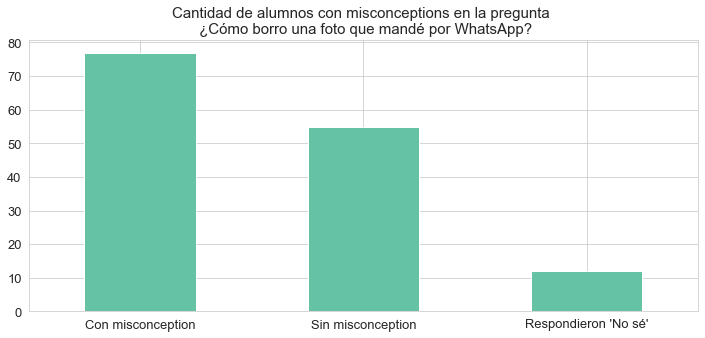

In [18]:
positions = (0, 1, 2)
labels = ("Con misconception", "Sin misconception", "Respondieron 'No sé'")




df['misconception_borrar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_borrar_fotos', a1='a_borrar_fotos_nopuedo', a2='a_borrar_fotos_nose'), axis=1)
df["misconception_borrar_fotos2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo borro una foto que mandé por WhatsApp?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


# Red de telefonía móvil

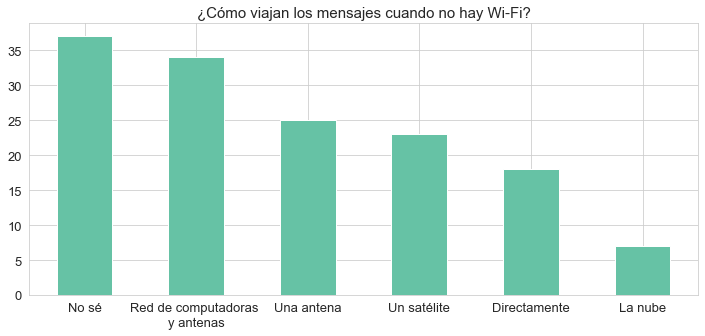

In [19]:
# Sofi está en la calle sin Wi-Fi y le quiere mandar un mensaje de WhatsApp a Santi.  ¿Cuál de las cinco imágenes representa mejor la manera en la que el mensaje viaja?


positions = (0, 1, 2, 3, 4, 5)
labels = ("No sé", \
          "Red de computadoras \ny antenas", \
          "Una antena", \
          "Un satélite", \
          "Directamente", 
          "La nube")


df["q_mensaje_sin_wifi"].value_counts().plot.bar(figsize=(12,5))
plt.title("¿Cómo viajan los mensajes cuando no hay Wi-Fi?", fontsize=15)

plt.xticks(positions, labels, rotation=0);


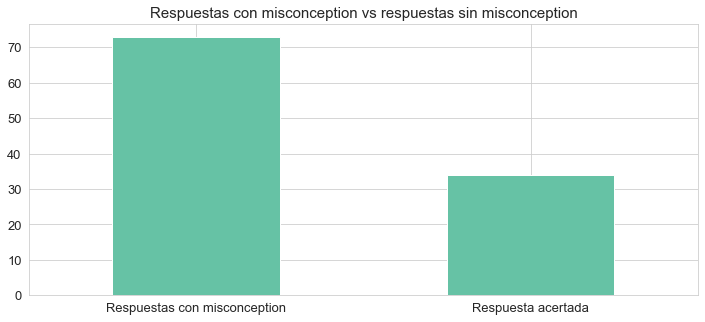

In [20]:
some_values = ['otras', 'red']
positions = (0, 1)
labels = ("Respuestas con misconception", \
          "Respuesta acertada")

df2 = df.loc[df['q_mensaje_sin_wifi_agrup'].isin(some_values)];
df2['q_mensaje_sin_wifi_agrup'].value_counts().plot.bar(figsize=(12,5));
plt.title("Respuestas con misconception vs respuestas sin misconception", fontsize=15)

plt.xticks(positions, labels, rotation=0);


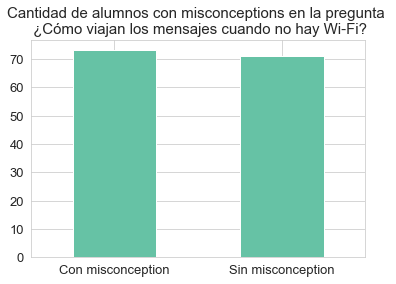

In [21]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_mensaje_sin_wifi'] = np.where((df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_red') | (df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_nose'), 'no', 'si')
df["misconception_mensaje_sin_wifi"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo viajan los mensajes cuando no hay Wi-Fi?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

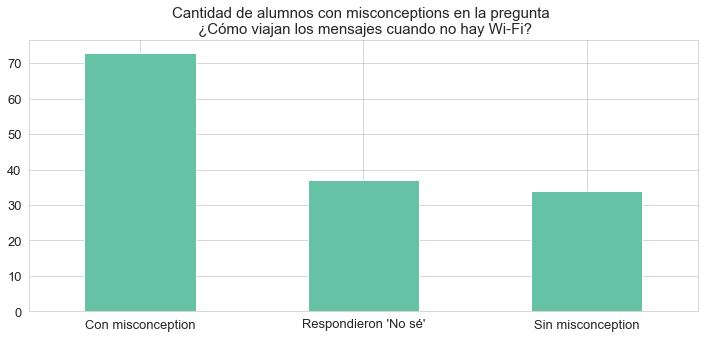

In [22]:
positions = (0, 1, 2)
labels = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")


df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)
df["misconception_mensaje_sin_wifi2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo viajan los mensajes cuando no hay Wi-Fi?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

# Gratuidad de las aplicaciones web

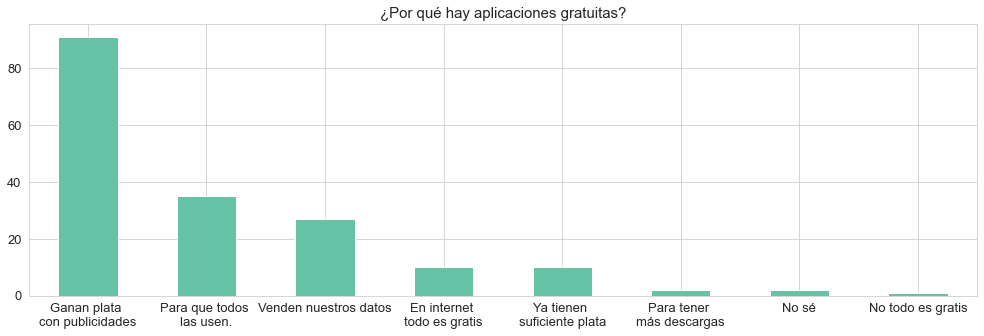

In [23]:
# ¿Por qué hay aplicaciones gratuitas?
positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("Ganan plata \ncon publicidades", \
          "Para que todos \nlas usen.", \
          "Venden nuestros datos", \
          "En internet \ntodo es gratis", \
          "Ya tienen \nsuficiente plata", \
          "Para tener \nmás descargas", \
          "No sé",
          "No todo es gratis")


df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(17,5))

plt.title("¿Por qué hay aplicaciones gratuitas?", fontsize=15)

plt.xticks(positions, labels, rotation=0);

In [24]:
#data frame con la las distintas respuestas a esta pregunta y la cantidad de veces que fueron respondidas

df_gratuidad = df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).reset_index()
df_gratuidad.columns = ['respuesta', 'cantidad']
df_gratuidad

,respuesta,cantidad
0,a_gratuidad_publicidades,91
1,a_gratuidad_paraquetodoslasusen,35
2,a_gratuidad_datos,27
3,a_gratuidad_todoeninternetesgratis,10
4,a_gratuidad_yatienenplata,10
5,a_gratuidad_descargas,2
6,a_gratuidad_nose,2
7,a_gratuidad_notodoesgratis,1


In [25]:
# Aca misconception parcial NO ES misconception
# O sea: rta correcta + tras incorrectas = respuesta correcta
 
df['misconception_gratuidad3'] = df.apply(lambda x: classify_answers_gratuidad(x), axis=1)
df["misconception_gratuidad3"].value_counts()


no    74
si    70
Name: misconception_gratuidad3, dtype: int64

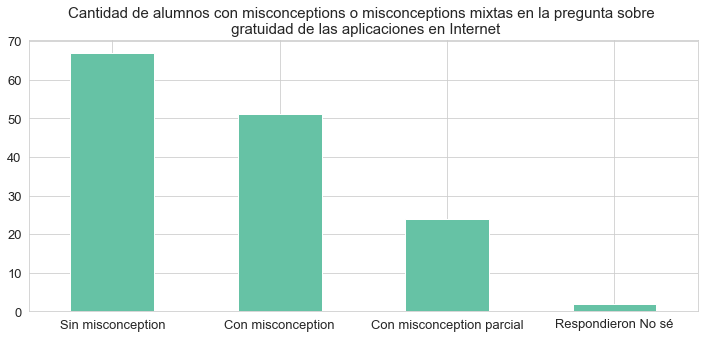

In [26]:
# Acá voy a dividir en 3: los que respondieron SOLO la respuesta correcta (a_gratuidad_publicidades), Mixtos (a_gratuidad_publicidades + otra), Incorrectas (no respondio a_gratuidad_publicidades) y No se.

positions = (0, 1, 2, 3)
labels = ("Sin misconception", \
          "Con misconception", \
          "Con misconception parcial", \
          "Respondieron No sé")

df['misconception_gratuidad_grupos'] = df.apply(lambda x: classify_answers_gratuidad_3grupos(x), axis=1)

df["misconception_gratuidad_grupos"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions o misconceptions mixtas en la pregunta sobre \n gratuidad de las aplicaciones en Internet", \
        fontsize=15);

plt.xticks(positions, labels, rotation=0);

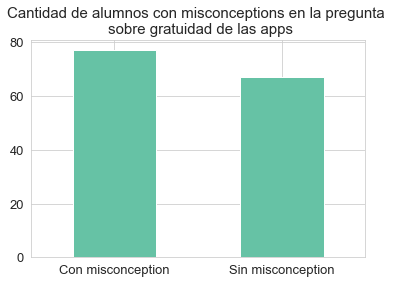

In [27]:
# sin misconception = respondio solo a_gratuidad_publicidades

positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_gratuidad'] = np.where((df['q_gratuidad']=='a_gratuidad_publicidades'), 'no', 'si')
df["misconception_gratuidad"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);
# Acá estoy considerando que NO tienen misconceptions solo a aquellos que contestaron UNICAMENTE que a_gratuidad_publicidades.
# Los que respondieron a_gratuidad_publicidades + otra cosa los considero incorrectos.

plt.xticks(positions, labels, rotation=0);

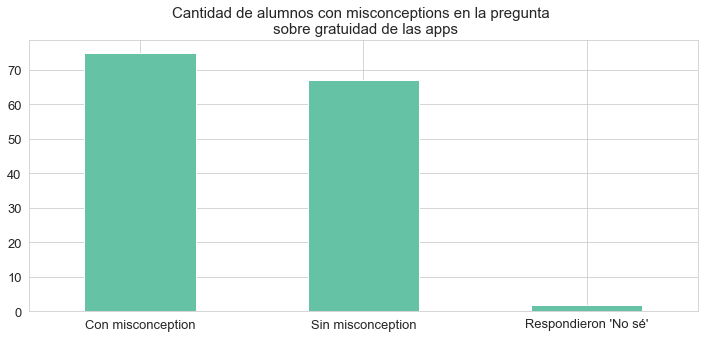

In [28]:
# sin misconception = respondio solo a_gratuidad_publicidades o a_gratuidad_nose


positions = (0, 1, 2)
labels = ("Con misconception", "Sin misconception", "Respondieron 'No sé'")

df['misconception_gratuidad2'] = df.apply(lambda x: classify_answers(x, q='q_gratuidad', a1='a_gratuidad_publicidades', a2='a_gratuidad_nose'), axis=1)
df["misconception_gratuidad2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

# Relación entre preguntas

In [29]:
df['tiene_alguna_misconception'] = np.where((df['misconception_yt2']=='si')|
                                            (df['misconception_gratuidad3']=='si') | \
                                            (df['misconception_acceso_fotos2']=='si') | \
                                            (df['misconception_mandar_fotos2']=='si')  | \
                                            (df['misconception_borrar_fotos2']=='si')  | \
                                            (df['misconception_mensaje_sin_wifi2']=='si'), 'si', 'no')

In [30]:
df[df['tiene_alguna_misconception'] == 'no']
# hay solo 5 chicos que no tiene ninguna misconception


,timestamp,q_edad,q_genero,q_donde_compu,q_que_haces_compu,q_donde_aprendiste_compu,q_que_celu_usas,q_que_haces_celu,q_yt,q_acceso_fotos,...,misconception_mandar_fotos2,misconception_borrar_fotos,misconception_borrar_fotos2,misconception_mensaje_sin_wifi,misconception_mensaje_sin_wifi2,misconception_gratuidad3,misconception_gratuidad_grupos,misconception_gratuidad,misconception_gratuidad2,tiene_alguna_misconception
47,4/19/2021 16:37:01,9,f,a_donde_compu_casa,"a_que_haces_compu_videos, a_que_haces_compu_ta...",a_donde_aprendiste_compu_casa,a_que_celu_usas_propio,"a_que_haces_celu_chat, a_que_haces_celu_redes,...",a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no se,no,correcta,no,no,no
73,4/25/2021 5:12:01,10,m,a_donde_compu_casa,"a_que_haces_compu_juegos, a_que_haces_compu_vi...",a_donde_aprendiste_compu_casa,a_que_celu_usas_propio,"a_que_haces_celu_videos, a_que_haces_celu_juegos",a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no,correcta,no,no,no
76,4/25/2021 20:09:06,9,f,a_donde_compu_casa,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_donde_aprendiste_compu_casa,a_que_celu_usas_prestado,"a_que_haces_celu_redes, a_que_haces_celu_video...",a_yt_nose,a_acceso_fotos_yo,...,no se,no,no se,no,no se,no,correcta,no,no,no
79,4/25/2021 23:28:42,10,m,a_donde_compu_casa,a_que_haces_compu_tarea,a_donde_aprendiste_compu_solo,a_que_celu_usas_nouso,a_que_haces_celu_nouso,a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no,correcta,no,no,no
112,5/2/2021 23:59:27,9,m,a_donde_compu_casa,"a_que_haces_compu_juegos, a_que_haces_compu_vi...",a_donde_aprendiste_compu_solo,a_que_celu_usas_prestado,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_yt_muchisimascompu,a_acceso_fotos_yo,...,no,no,no,no,no,no,correcta,no,no,no


In [31]:
#data frame con presencia de misconceptions en las distintas preguntas

df_misconceptions = df[['misconception_yt', 
                        'misconception_acceso_fotos', 
                        'misconception_mandar_fotos', 
                        'misconception_borrar_fotos', 
                        'misconception_mensaje_sin_wifi', 
                        'misconception_gratuidad3']].copy() # consideramos misconception parcial como SIN MISCONCEPTION y NO SE como SIN MISCONCEPTION

df_misconceptions = df_misconceptions.rename(columns={"misconception_yt": "Youtube",
                                  "misconception_acceso_fotos": "Acceso Fotos",
                                  "misconception_mandar_fotos": "Mandar Fotos",
                                  "misconception_borrar_fotos": "Borrar Fotos",
                                  "misconception_mensaje_sin_wifi": "Mensaje sin WiFi",
                                  "misconception_gratuidad3": "Gratuidad Apps"})

for col in df_misconceptions.columns:
    df_misconceptions[col] = df_misconceptions[col].transform(lambda x: 1.0 if x == 'si' else 0.0)
df_misconceptions.head()



,Youtube,Acceso Fotos,Mandar Fotos,Borrar Fotos,Mensaje sin WiFi,Gratuidad Apps
0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0


## Frecuencia de cantidad de misconceptions

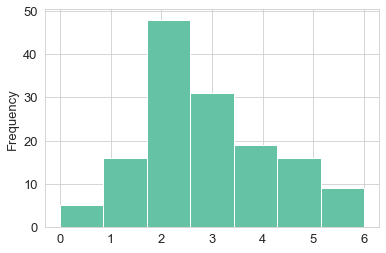

In [32]:
df_misconceptions.sum(axis=1).plot.hist(bins=7);

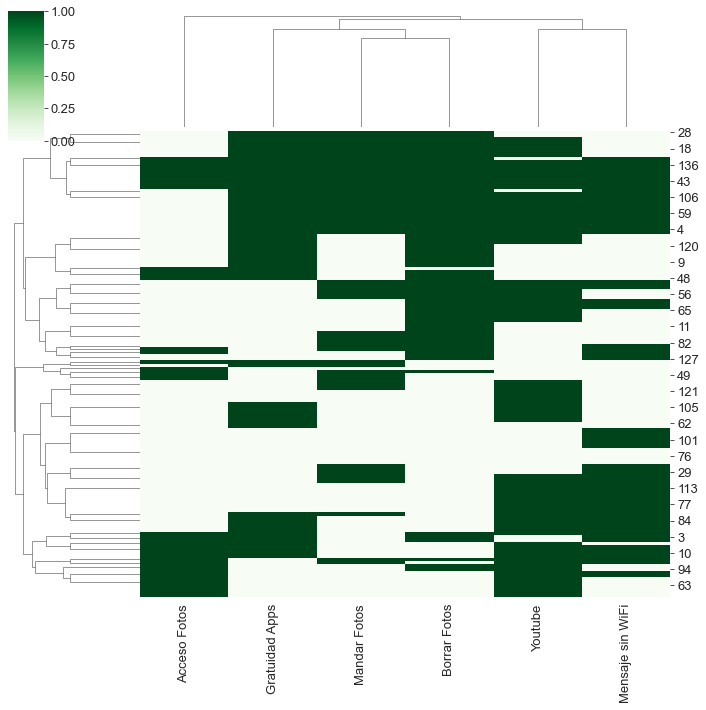

In [33]:
# Clustermap con relaciones entre las preguntas segun las misconceptions que hay en cada una
sns.clustermap(df_misconceptions, cmap='Greens');

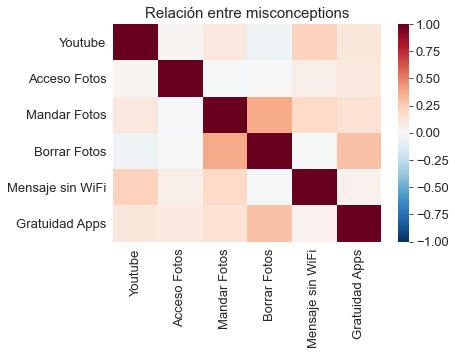

In [34]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 

ax = plt.axes()
sns.heatmap(df_misconceptions.corr(method='pearson'), ax=ax, vmax=1, vmin=-1, cmap='RdBu_r');
ax.set_title('Relación entre misconceptions', fontsize=15)
plt.show()

# * pearson : standard correlation coefficient
# * kendall : Kendall Tau correlation coefficient
# * spearman : Spearman rank correlation

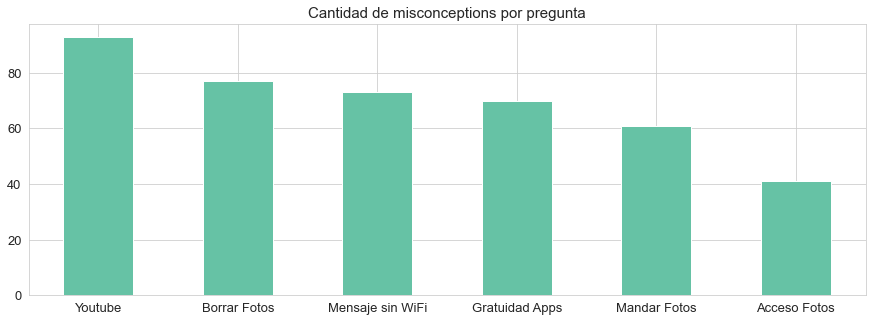

In [35]:
#Cantidad de misconceptions por pregunta, considerando que misconception parcial NO es misconception

df_misconceptions.sum(axis=0).sort_values(ascending=False).plot.bar(figsize=(15,5), rot=0)
plt.title("Cantidad de misconceptions por pregunta", fontsize=15);

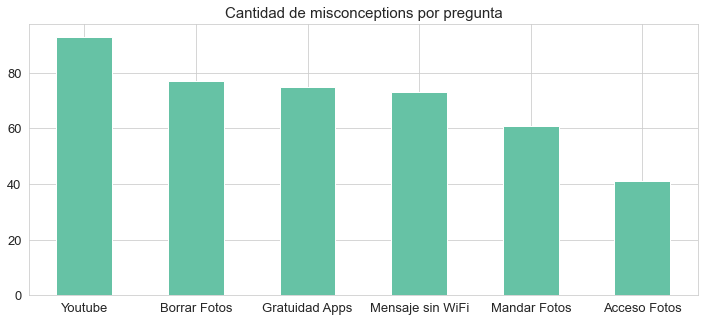

In [36]:
#aca Consideramos a los que tienen misconception parcial como CON misconception.

#https://seaborn.pydata.org/generated/seaborn.clustermap.html
df_misconceptions_parcial = df[['misconception_yt', 
                        'misconception_acceso_fotos', 
                        'misconception_mandar_fotos', 
                        'misconception_borrar_fotos', 
                        'misconception_mensaje_sin_wifi', 
                        'misconception_gratuidad2']].copy() # ACA MISCONCEPTION PARCIAL ES MISCONCEPTION

for col in df_misconceptions_parcial.columns:
    df_misconceptions_parcial[col] = df_misconceptions_parcial[col].transform(lambda x: 1.0 if x == 'si' else 0.0)
df_misconceptions_parcial.head()


df_misconceptions_parcial = df_misconceptions_parcial.rename(columns={"misconception_yt": "Youtube",
                                  "misconception_acceso_fotos": "Acceso Fotos",
                                  "misconception_mandar_fotos": "Mandar Fotos",
                                  "misconception_borrar_fotos": "Borrar Fotos",
                                  "misconception_mensaje_sin_wifi": "Mensaje sin WiFi",
                                  "misconception_gratuidad2": "Gratuidad Apps"})

df_misconceptions_parcial

df_misconceptions_parcial.sum(axis=0).sort_values(ascending=False).plot.bar(figsize=(12,5), rot=0)
plt.title("Cantidad de misconceptions por pregunta", fontsize=15);

# Relación entre respuestas

## YouTube - Mensaje sin WiFi

In [37]:
df_yt_vs_wifi =  df[['q_yt', 'q_mensaje_sin_wifi']].copy()
df_binary = pd.concat([pd.get_dummies(df_yt_vs_wifi['q_yt']), 
                    pd.get_dummies(df_yt_vs_wifi['q_mensaje_sin_wifi'])], 
                   axis=1)

df_binary = df_binary.rename(columns={"a_yt_1compu": "YouTube - Una compu",
                                  "a_yt_celular": "YouTube - Celular",
                                  "a_yt_muchascompu": "YouTube - Muchas compus",
                                  "a_yt_muchisimascompu": "YouTube - Muchísimas compus",
                                  "a_yt_nose": "YouTube - No sé",
                                  "a_yt_nube": "YouTube - Nube",
                                  "a_mensaje_sin_wifi_antena": "Sin WiFi - Antena",
                                  "a_mensaje_sin_wifi_directo": "Sin WiFi - Directamente",
                                  "a_mensaje_sin_wifi_nose": "Sin WiFi - No sé",
                                  "a_mensaje_sin_wifi_nube": "Sin WiFi - Nube",
                                  "a_mensaje_sin_wifi_red": "Sin WiFi - Red",
                                  "a_mensaje_sin_wifi_satelite": "Sin WiFi - Satélite"})



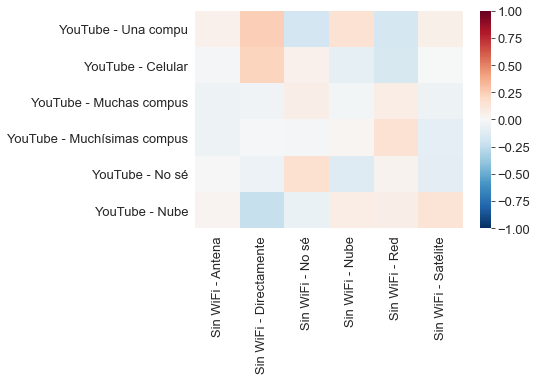

In [38]:
sns.heatmap(df_binary.corr().iloc[:6,6:], cmap='RdBu_r', vmax=1, vmin=-1);

In [39]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Una compu'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Una compu,,
0,118,13
1,8,5


In [40]:
#https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
    
from scipy.stats import chi2_contingency

# chi2 : float
#     The test statistic.
# p : float
#     The p-value of the test
# dof : int
#     Degrees of freedom
# expected : ndarray, same shape as `observed`
#     The expected frequencies, based on the marginal sums of the table.

chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)

In [41]:
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.01 (chi2: 6.39)


array([[114.625,  16.375],
       [ 11.375,   1.625]])

In [42]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Celular'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Celular,,
0,113,12
1,13,6


In [43]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)

print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected


chi square result: 0.02 (chi2: 5.41)


array([[109.375,  15.625],
       [ 16.625,   2.375]])

In [44]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Nube'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Nube,,
0,69,16
1,57,2


In [45]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.01 (chi2: 6.24)


array([[74.375, 10.625],
       [51.625,  7.375]])

In [46]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Muchísimas compus'], 
                               columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Muchísimas compus,,
0,111,16
1,15,2


In [47]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected


chi square result: 1.00 (chi2: 0.00)


array([[111.125,  15.875],
       [ 14.875,   2.125]])

In [48]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Nube'], 
                               columns=df_binary['Sin WiFi - Nube'])
cross_tab_result

Sin WiFi - Nube,0,1
YouTube - Nube,,
0,82,3
1,55,4


In [49]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.62 (chi2: 0.25)


array([[80.86805556,  4.13194444],
       [56.13194444,  2.86805556]])

## Borrar y Mandar Fotos

In [50]:
df_borrar_mandar =  df[['q_borrar_fotos', 'q_mandar_fotos']].copy()

df_binary_borrar_mandar = pd.concat([pd.get_dummies(df_borrar_mandar['q_borrar_fotos']), 
                    pd.get_dummies(df_borrar_mandar['q_mandar_fotos'])], 
                   axis=1)

df_binary_borrar_mandar = df_binary_borrar_mandar.rename(columns={"a_borrar_fotos_enelchat": "Borrar - En el chat",
                                  "a_borrar_fotos_enmicelu": "Borrar - En mi celu",
                                  "a_borrar_fotos_nopuedo": "Borrar - No puedo",
                                  "a_borrar_fotos_nose": "Borrar - No sé",
                                  "a_mandar_fotos_copia": "Mandar - copia",
                                  "a_mandar_fotos_enwa": "Mandar - En WhatsApp",
                                  "a_mandar_fotos_laveenmicelu": "Mandar - En mi celu",
                                  "a_mandar_fotos_nose": "Mandar - No sé"})


df_binary_borrar_mandar.head()

,Borrar - En el chat,Borrar - En mi celu,Borrar - No puedo,Borrar - No sé,Mandar - copia,Mandar - En WhatsApp,Mandar - En mi celu,Mandar - No sé
0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0


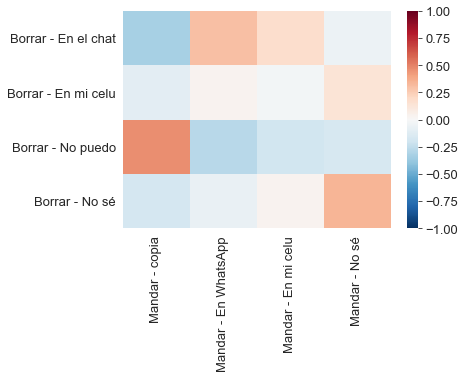

In [51]:
sns.heatmap(df_binary_borrar_mandar.corr().iloc[:4,4:], cmap='RdBu_r', vmax=1, vmin=-1);

In [52]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No puedo'], 
                               columns=df_binary_borrar_mandar['Mandar - copia'])
cross_tab_result

Mandar - copia,0,1
Borrar - No puedo,,
0,65,24
1,14,41


In [53]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.00 (chi2: 29.18)


array([[48.82638889, 40.17361111],
       [30.17361111, 24.82638889]])

In [54]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No sé'], 
                               columns=df_binary_borrar_mandar['Mandar - No sé'])
cross_tab_result


Mandar - No sé,0,1
Borrar - No sé,,
0,120,12
1,6,6


In [55]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.00 (chi2: 13.30)


array([[115.5,  16.5],
       [ 10.5,   1.5]])

In [56]:

cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - En el chat'], 
                               columns=df_binary_borrar_mandar['Mandar - En WhatsApp'])
cross_tab_result


Mandar - En WhatsApp,0,1
Borrar - En el chat,,
0,54,15
1,37,38


In [57]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.00 (chi2: 11.72)


array([[43.60416667, 25.39583333],
       [47.39583333, 27.60416667]])

In [58]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - En el chat'], 
                               columns=df_binary_borrar_mandar['Mandar - copia'])
cross_tab_result

Mandar - copia,0,1
Borrar - En el chat,,
0,26,43
1,53,22


In [59]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected


chi square result: 0.00 (chi2: 14.49)


array([[37.85416667, 31.14583333],
       [41.14583333, 33.85416667]])

In [60]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No puedo'], 
                               columns=df_binary_borrar_mandar['Mandar - En WhatsApp'])
cross_tab_result

Mandar - En WhatsApp,0,1
Borrar - No puedo,,
0,47,42
1,44,11


In [61]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")
expected

chi square result: 0.00 (chi2: 9.67)


array([[56.24305556, 32.75694444],
       [34.75694444, 20.24305556]])